# 911 Calls Capstone Project

## Data and Setup

____
** Import numpy and pandas **

In [220]:
import numpy as np
import pandas as pd

** Import visualization libraries and set %matplotlib inline. **

In [221]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [222]:
import matplotlib as mpl

mpl.rcParams['patch.force_edgecolor'] = True

** Read in the csv file as a dataframe called df **

In [223]:
df=pd.read_csv('911.csv')

** Check the info() of the df **

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [225]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

** What are the top 5 zipcodes for 911 calls? **

In [226]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships (twp) for 911 calls? **

In [227]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** Take a look at the 'title' column, how many unique title codes are there? **

In [228]:
df['title'].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

**For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS. **

In [229]:
df['reason']=df['title'].apply(lambda x:x.split(':')[0])

In [230]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 99492, dtype: object

** What is the most common Reason for a 911 call based off of this new column? **

In [231]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

** Now use seaborn to create a countplot of 911 calls by Reason. **

<Axes: xlabel='reason', ylabel='count'>

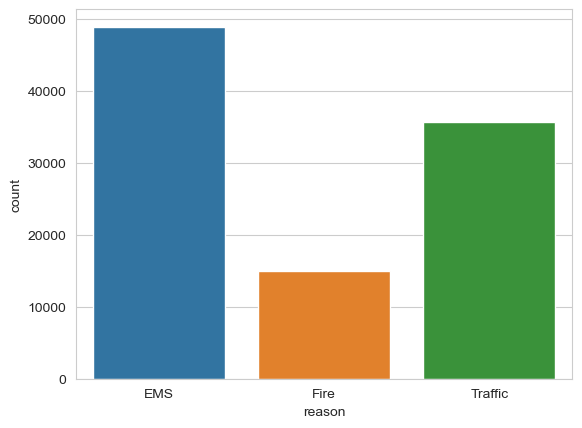

In [232]:
sns.countplot(df,x='reason')

___
** Now let us begin to focus on time information. What is the data type of the objects in the timeStamp column? **

In [233]:
type('timeStamp')

str

** You should have seen that these timestamps are still strings. Use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to convert the column from strings to DateTime objects. **

In [234]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])


In [235]:
df['timeStamp']

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [236]:
time=df['timeStamp'].iloc[0]
time.hour

17

** You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [237]:
df['hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Month']=df['timeStamp'].apply(lambda x:x.month)
df['datess']=df['timeStamp'].apply(lambda x:x.date())
df['DOW']=df['timeStamp'].apply(lambda x:x.day_of_week)

In [238]:
df['datess']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: datess, Length: 99492, dtype: object

** Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week: **

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [239]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['DOW']=df['DOW'].map(dmap)

In [240]:
df['DOW']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DOW, Length: 99492, dtype: object

** Now use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column. **

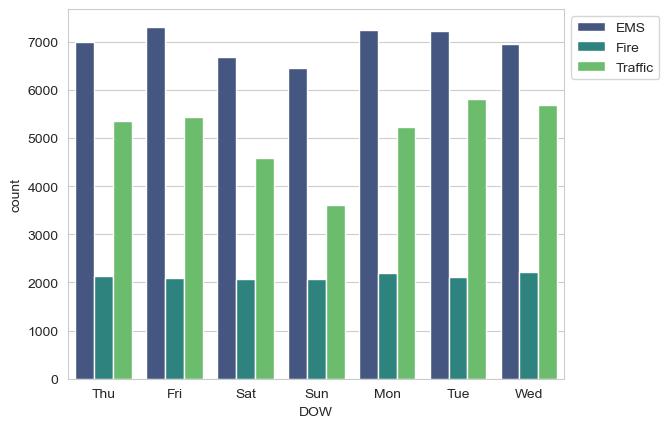

In [241]:
sns.countplot(df,x='DOW',hue='reason',palette='viridis')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

**Now do the same for Month:**

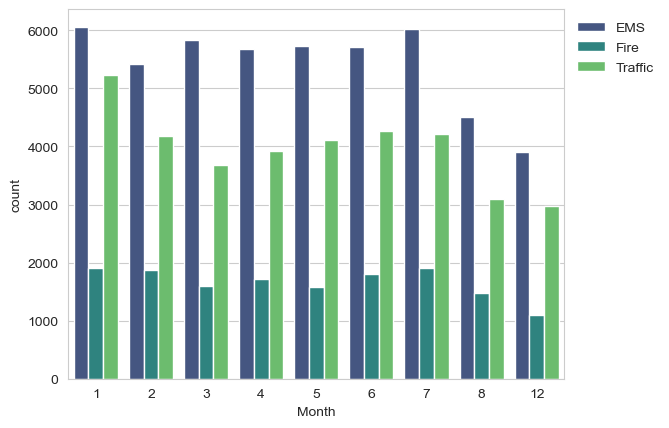

In [242]:
sns.countplot(df,x='Month',hue='reason',palette='viridis')
plt.legend(loc=2, bbox_to_anchor=(1, 1),frameon=False)

**Did you notice something strange about the Plot?**

_____

** You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months, in order to do this, we'll need to do some work with pandas... **

** Now create a gropuby object called byMonth, where you group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame. **

In [243]:
months=df.groupby('Month').count()
months.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,datess,DOW
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


** Now create a simple plot off of the dataframe indicating the count of calls per month. **

<Axes: xlabel='Month'>

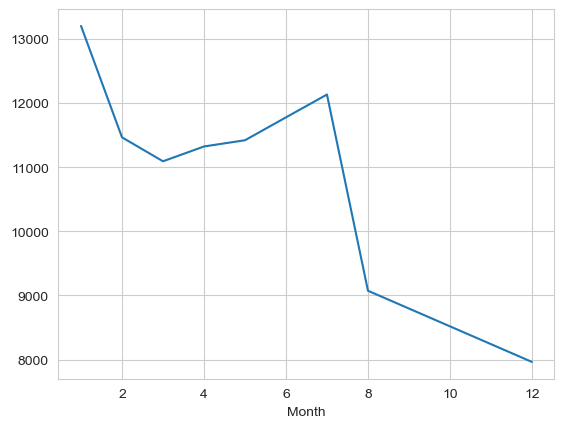

In [244]:
months['twp'].plot()

** Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column. **

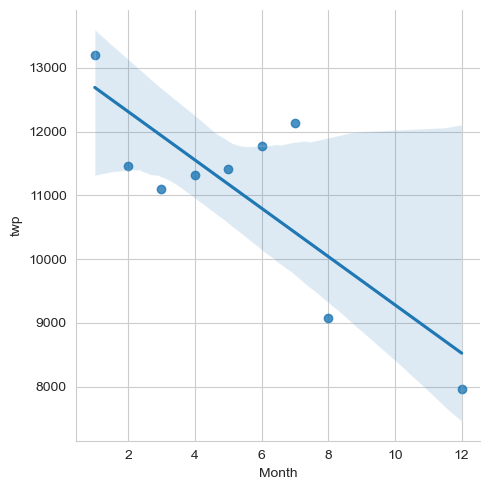

In [245]:
sns.lmplot(data=months.reset_index(),x='Month',y='twp')

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method. ** 

In [246]:
df['date']=df['timeStamp'].apply(lambda x:x.date())
df['date'].head()

0    2015-12-10
1    2015-12-10
2    2015-12-10
3    2015-12-10
4    2015-12-10
Name: date, dtype: object

** Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

<Axes: xlabel='date'>

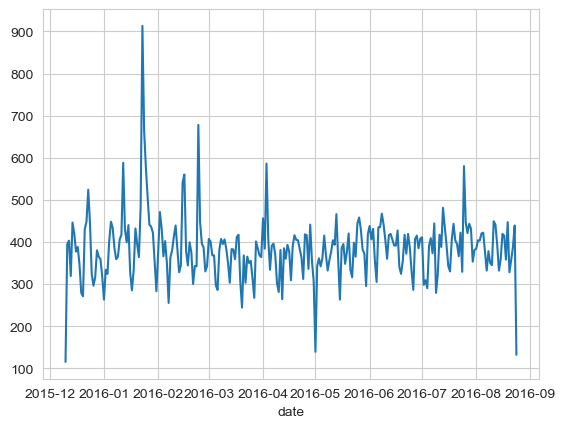

In [247]:
df.groupby('date').count()['twp'].plot()


** Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

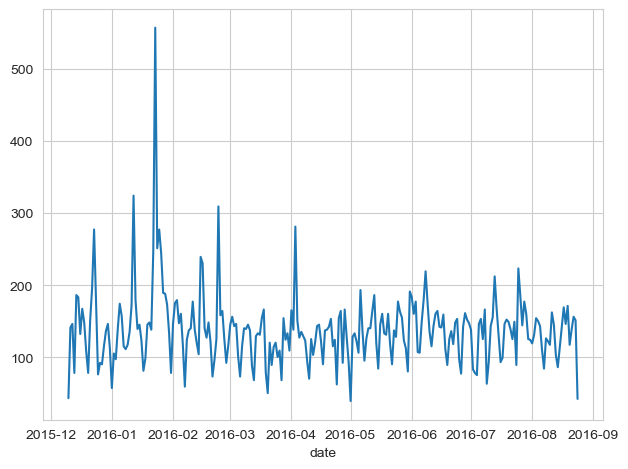

In [251]:
df[df['reason']=='Traffic'].groupby('date').count()['twp'].plot()
plt.tight_layout()

Text(0.5, 1.0, 'FIRE')

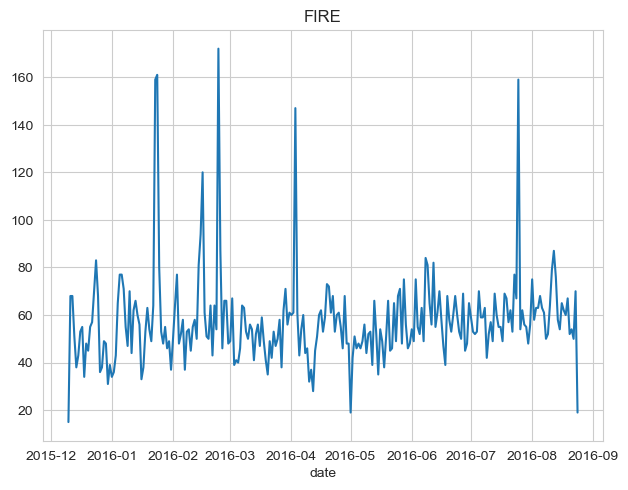

In [252]:
df[df['reason']=='Fire'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('FIRE')

Text(0.5, 1.0, 'EMS')

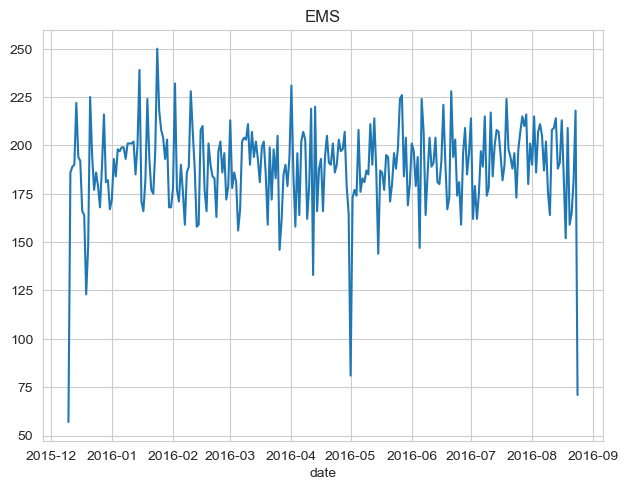

In [253]:
df[df['reason']=='EMS'].groupby('date').count()['twp'].plot()
plt.tight_layout()
plt.title('EMS')

____
** Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method.

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   reason     99492 non-null  object        
 10  hour       99492 non-null  int64         
 11  Month      99492 non-null  int64         
 12  datess     99492 non-null  object        
 13  DOW        99492 non-null  object        
 14  date       99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 11.4+ MB


In [255]:
del df['reason']

In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
 9   hour       99492 non-null  int64         
 10  Month      99492 non-null  int64         
 11  datess     99492 non-null  object        
 12  DOW        99492 non-null  object        
 13  date       99492 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(3), object(7)
memory usage: 10.6+ MB


In [257]:
dayhour=df.groupby(by=['DOW','hour']).count()['twp'].unstack()
dayhour.head()

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DOW,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,931,980,1039,980,819,696,667,558,514,474
Mon,282,220,201,194,204,267,397,653,819,785,...,869,913,988,997,885,746,612,496,471,325
Sat,373,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,627,571,505,467
Sun,383,304,285,268,242,240,300,401,483,620,...,684,691,663,714,670,654,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1011,810,698,617,553,424,354


** Now create a HeatMap using this new DataFrame. **

<Axes: xlabel='hour', ylabel='DOW'>

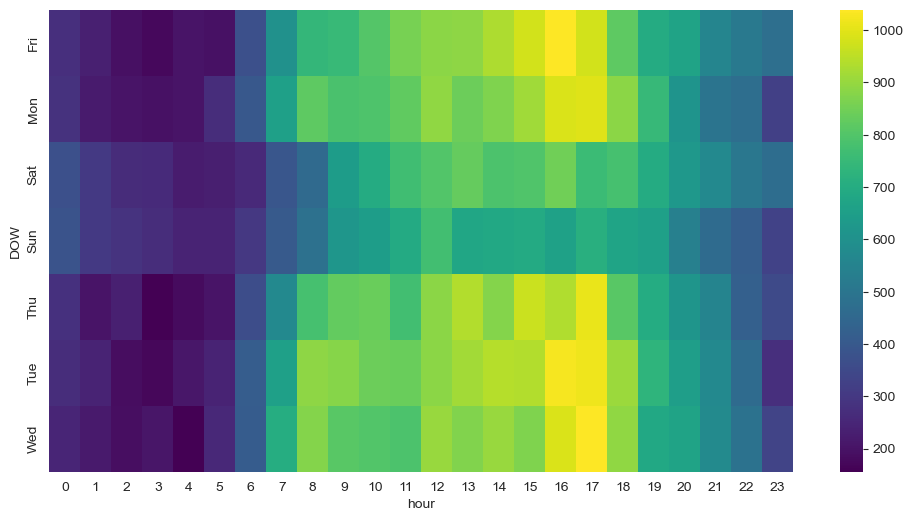

In [258]:
plt.figure(figsize=(12,6))
sns.heatmap(dayhour,cmap='viridis')

** Now create a clustermap using this DataFrame. **

<Figure size 1200x600 with 0 Axes>

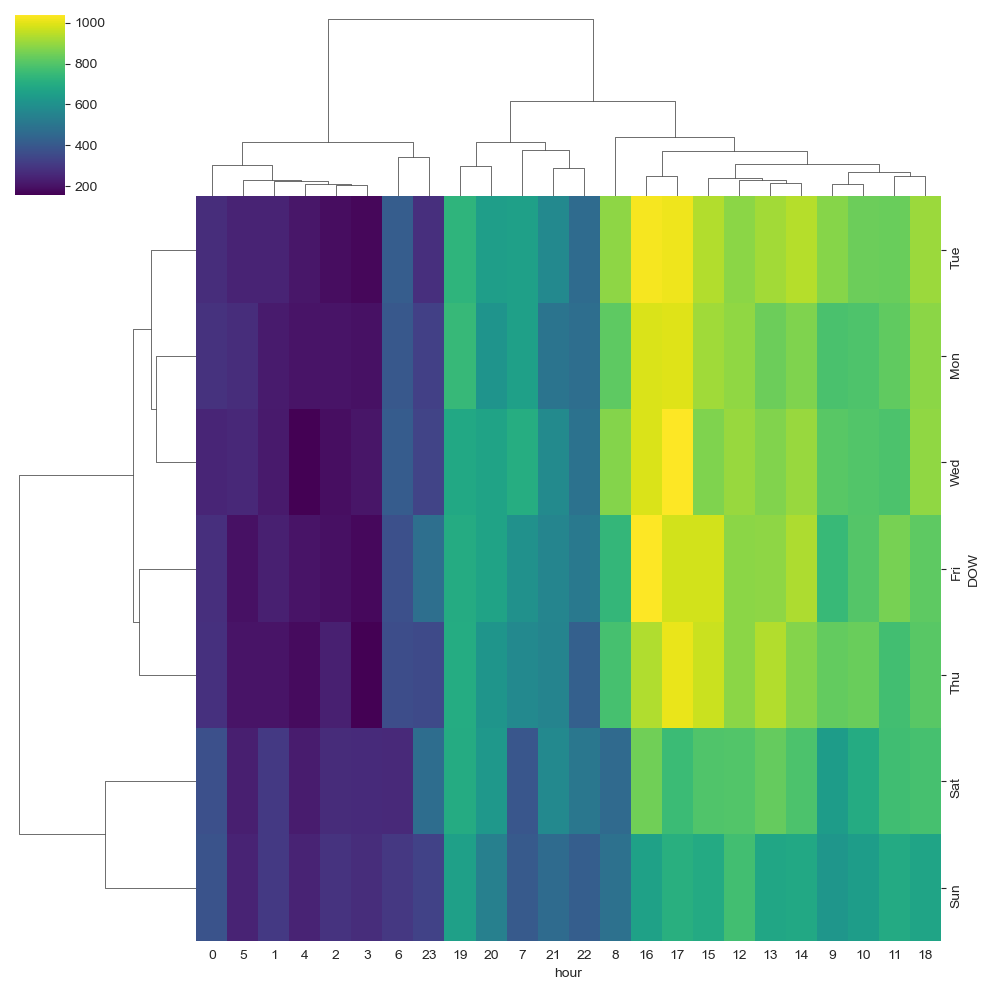

In [259]:
plt.figure(figsize=(12,6))
sns.clustermap(dayhour,cmap='viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [260]:
bymonth=df.groupby(by=['DOW','Month']).count()['twp'].unstack()
bymonth

Month,1,2,3,4,5,6,7,8,12
DOW,,,,,,,,,
Fri,1970,1581,1523,1958,1730,1649,2045,1310,1064
Mon,1727,1964,1533,1597,1779,1617,1692,1509,1256
Sat,2290,1440,1264,1732,1444,1388,1695,1099,978
Sun,1960,1229,1100,1488,1422,1331,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1227,1265
Tue,1973,1753,1884,1430,1917,1673,1668,1612,1233
Wed,1699,1902,1888,1517,1538,2054,1715,1295,1260


<Axes: xlabel='Month', ylabel='DOW'>

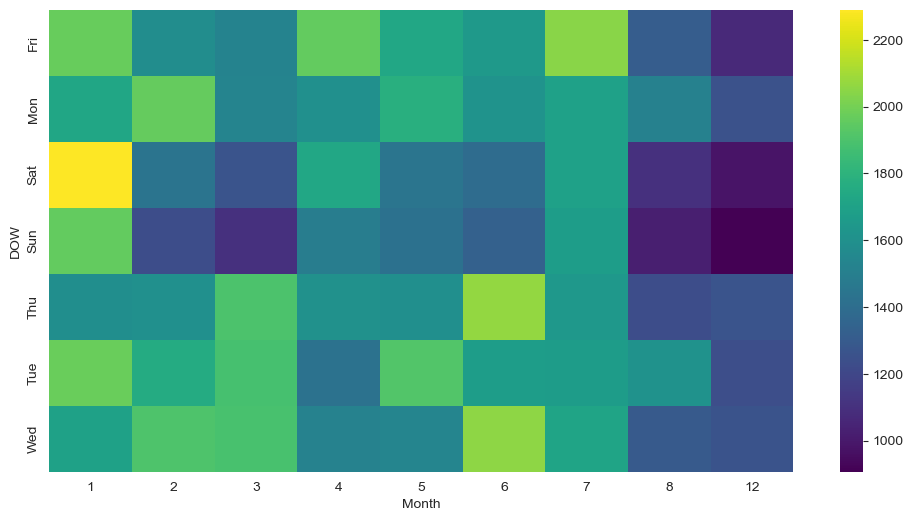

In [261]:
plt.figure(figsize=(12,6))
sns.heatmap(bymonth,cmap='viridis')

<Figure size 1200x600 with 0 Axes>

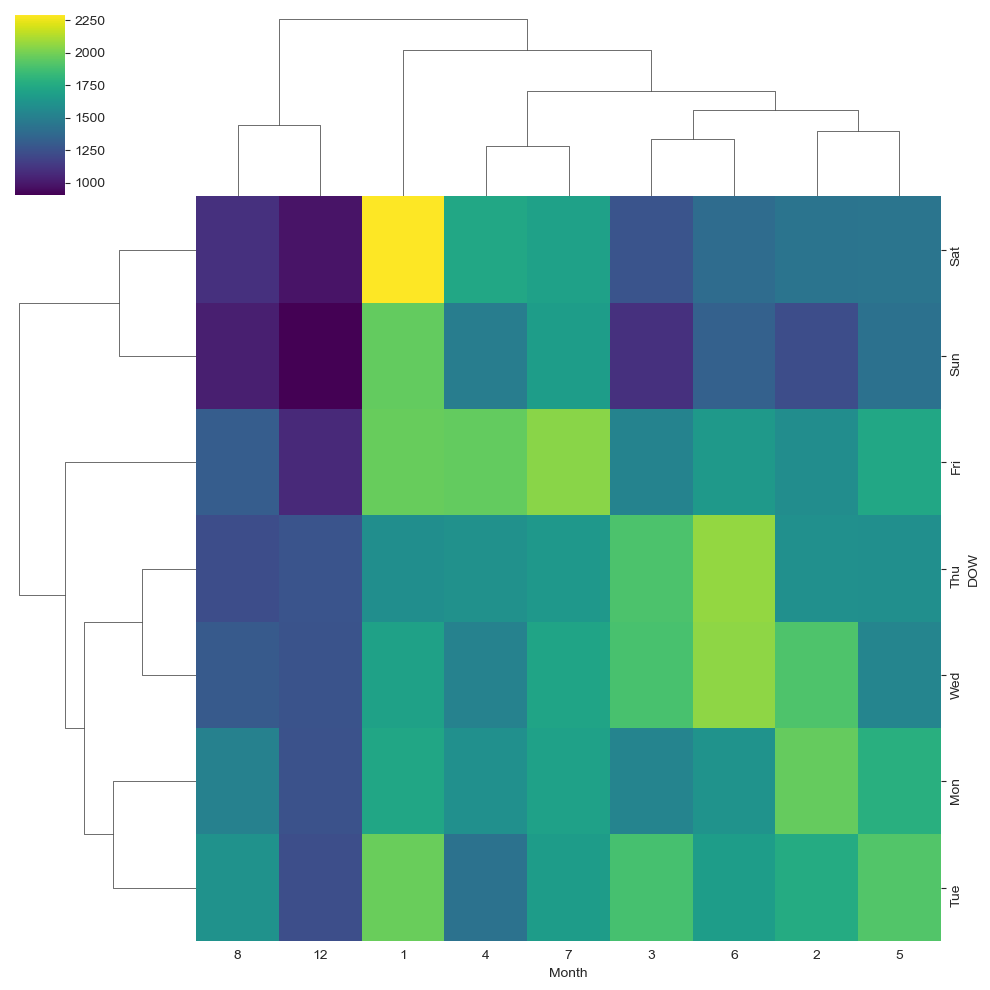

In [262]:
plt.figure(figsize=(12,6))
sns.clustermap(bymonth,cmap='viridis')

 # THANK YOU.